#Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Task 1: Data Preprocessing

##a. Load the dataset into a pandas DataFrame

In [ ]:
data = pd.read_csv("/content/Data - A1.csv")

##b. Normalize the feature variable

In [ ]:
#print(data)
mean = data['X'].mean()
std = data['X'].std()
data['X'] = (data['X'] - mean) / std

##c. Shuffle and split the dataset

In [ ]:
shuffled_data = data.sample(frac=1, random_state=42)  # Shuffle the data
train_size = int(0.8 * len(data))
train_data = shuffled_data[:train_size]
test_data = shuffled_data[train_size:]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

#Task 2: Polynomial Regression

In [ ]:
def polynomial_features(X, degree):
    """Generate polynomial features of given degree."""
    X_poly = np.column_stack([X**i for i in range(0, degree + 1)])
    return X_poly

In [ ]:
def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        error = X.dot(theta) - y
        gradient = X.T.dot(error) / m
        theta -= learning_rate * gradient
    return theta

In [ ]:
best_degree = None
best_theta = None
best_mse = float('inf')
best_history = None
learning_rate = 0.01
iterations = 500

for degree in range(1, 10):
    X_train_poly = polynomial_features(train_data['X'], degree)
    X_test_poly = polynomial_features(test_data['X'], degree)

    theta = np.zeros(degree+1)
    theta = batch_gradient_descent(X_train_poly, train_data['Y'].values, theta, learning_rate, iterations)

    # Calculate MSE on test data
    predictions = X_test_poly.dot(theta)
    mse = np.mean((predictions - test_data['Y'])**2)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree
        best_theta = theta

<ipython-input-16-19d0a8cdb4c1>:6: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


#Task 3: Graph Plotting

##a. Final Training and Testing Errors vs. degree of polynomial

<ipython-input-16-19d0a8cdb4c1>:6: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


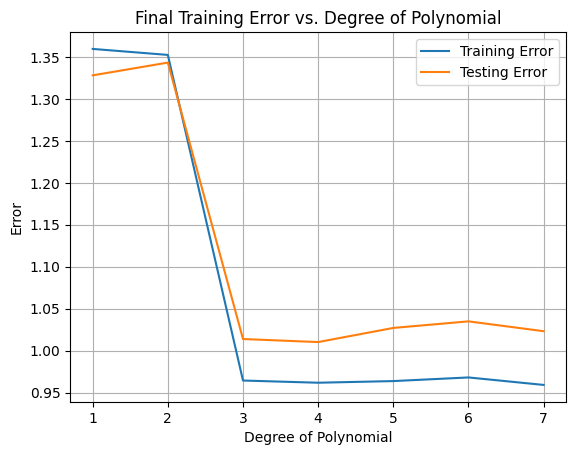

In [ ]:
training_error = []
testing_error = []

for degree in range(1, 10):
  X_train_poly = polynomial_features(train_data['X'], degree)
  X_test_poly = polynomial_features(test_data['X'], degree)

  theta = np.zeros(degree+1)

  theta = batch_gradient_descent(X_train_poly, train_data['Y'], theta, learning_rate, iterations)

  training_predictions = X_train_poly.dot(theta)
  training_mse = np.mean((training_predictions - train_data['Y'])**2)
  training_error.append(training_mse)

  testing_predictions = X_test_poly.dot(theta)
  testing_mse = np.mean((testing_predictions - test_data['Y'])**2)
  testing_error.append(testing_mse)

degrees = list(range(1,10))
plt.plot(degrees, training_error, label='Training Error')
plt.plot(degrees, testing_error, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.title('Final Training Error vs. Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()

##b. Training Error and Testing Error vs. Epochs for all degrees

<ipython-input-16-19d0a8cdb4c1>:6: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


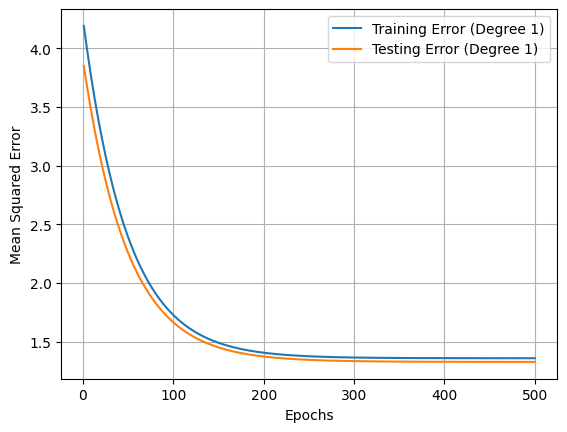

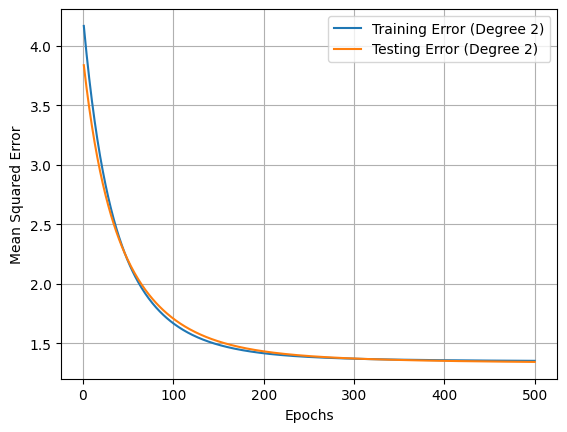

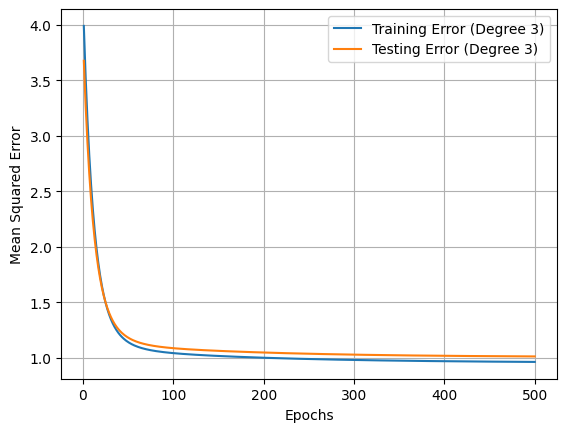

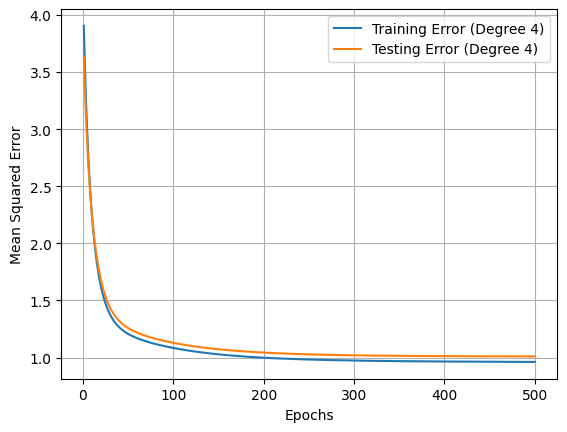

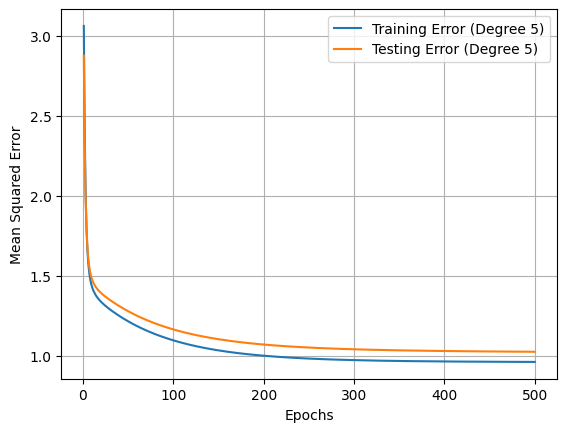

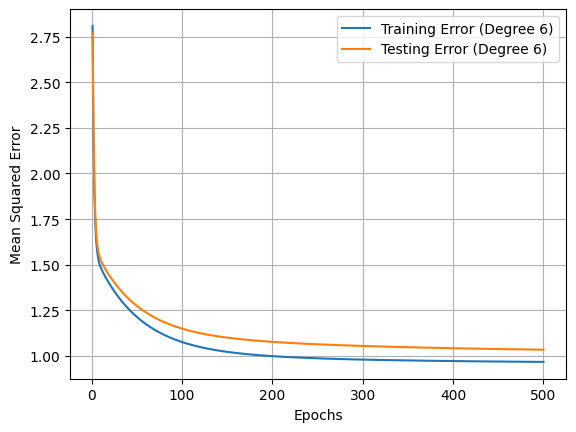

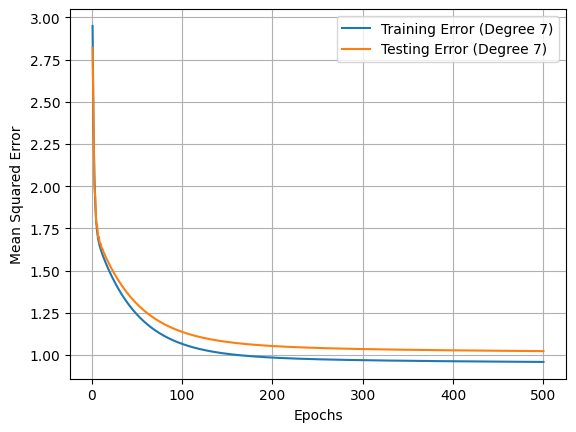

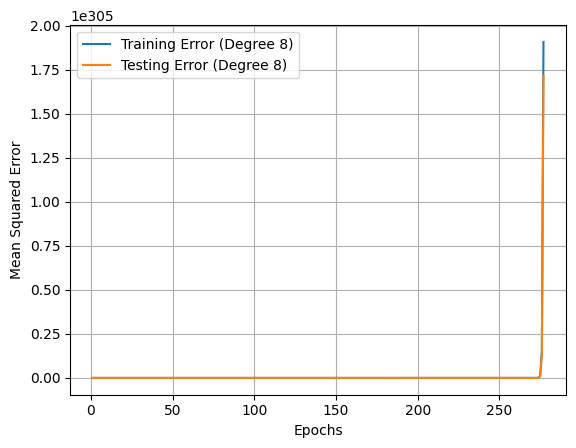

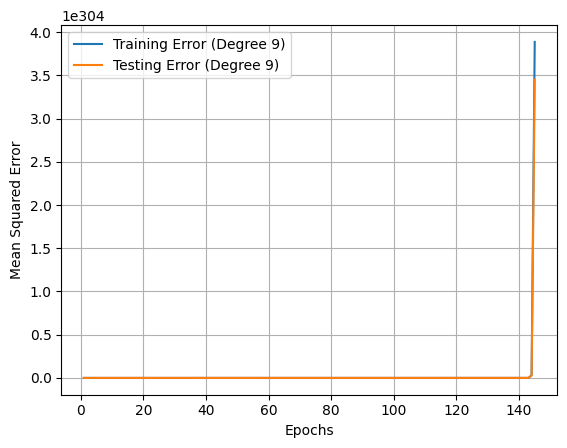

In [ ]:
num_epoch = 500
epoch_range = range(1,num_epoch+1)

train_errors_epoch = {degree : [] for degree in degrees}
test_errors_epoch = {degree : [] for degree in degrees}

for degree in range(1,10):
  X_train_poly = polynomial_features(train_data['X'],degree)
  X_test_poly = polynomial_features(test_data['X'],degree)

  theta = np.zeros(degree+1)
  for epoch in epoch_range:
    theta = batch_gradient_descent(X_train_poly,train_data['Y'],theta,learning_rate,1)

    training_predictions = X_train_poly.dot(theta)
    training_mse = np.mean((training_predictions - train_data['Y'])**2)
    train_errors_epoch[degree].append(training_mse)

    testing_predictions = X_test_poly.dot(theta)
    testing_mse = np.mean((testing_predictions - test_data['Y'])**2)
    test_errors_epoch[degree].append(testing_mse)

for degree in degrees:
  plt.plot(epoch_range, train_errors_epoch[degree], label=f'Training Error (Degree {degree})')
  plt.plot(epoch_range, test_errors_epoch[degree], label=f'Testing Error (Degree {degree})')
  plt.xlabel('Epochs')
  plt.ylabel('Mean Squared Error')
  plt.legend()
  plt.grid(True)
  plt.show()



##c. The best polynomial fitted curve on the data points

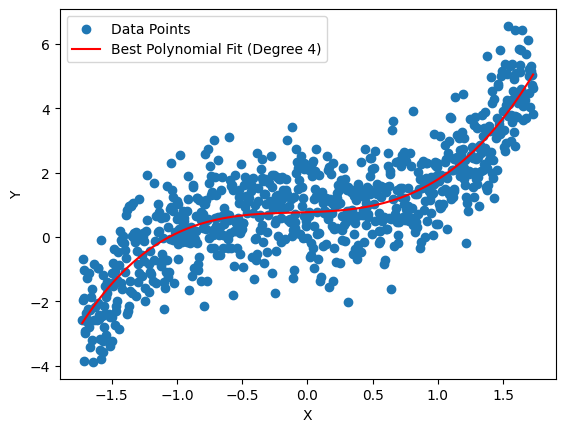

In [ ]:
subset_data = train_data.sample(n=800, random_state=42)

# Plot the best polynomial fitted curve
plt.scatter(subset_data['X'], subset_data['Y'], label='Data Points')
x_range = np.linspace(min(subset_data['X']), max(subset_data['X']), 100)
x_poly = polynomial_features(x_range, best_degree)
y_poly = np.dot(x_poly, best_theta)
plt.plot(x_range, y_poly, color='red', label=f'Best Polynomial Fit (Degree {best_degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()